In [27]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Descargar los recursos de NLTK necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el archivo CSV
data = pd.read_csv('C:/Users/USUARIO/Downloads/archive/Final-Dataset.csv')

# Función para limpiar el texto
def clean_text(text):
    # Eliminar etiquetas HTML
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Convertir a minúsculas y eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Stemming (opcional)
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(word) for word in tokens]
    # Unir tokens nuevamente
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Aplicar la función de limpieza a la columna de texto
data['text_cleaned'] = data['FORMATTED_CONTENT'].apply(clean_text)

# Mostrar los datos preprocesados
print(data['text_cleaned'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    way entrepreneurial students share idea like b...
1    back uk thanks positiveparents wilmagarvin dem...
2                       totally unexpected great night
3    bodysculpter hi email u morning received blank...
4    hello world welcome affordable web pro blog ht...
Name: text_cleaned, dtype: object


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un objeto TF-IDF Vectorizer con un número máximo de características
max_features = 5000  
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Ajustar y transformar los datos de texto limpio
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_cleaned'])

# Obtener las características TF-IDF en un DataFrame de pandas
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Imprimir las primeras filas del DataFrame para ver las características TF-IDF
print(tfidf_df.head())


    aa  aan  aapl   ab  abc  aber  ability  able  abraham  absolutely  ...   
0  0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0      0.0         0.0  ...  \
1  0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0      0.0         0.0  ...   
2  0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0      0.0         0.0  ...   
3  0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0      0.0         0.0  ...   
4  0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0      0.0         0.0  ...   

   zonepa  zopeplonedev  zou   zr   zu  zum  zur   zx  zxxhl   zz  
0     0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
1     0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
2     0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
3     0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
4     0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  

[5 rows x 5000 columns]


In [31]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y etiquetas (y)
X = tfidf_df  # Características TF-IDF
y = data['CLASS']  # Etiquetas (clase spam o no spam)

# Dividir los datos en conjuntos de entrenamiento y pruebas (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y pruebas
print("Dimensiones del conjunto de entrenamiento X:", X_train.shape)
print("Dimensiones del conjunto de prueba X:", X_test.shape)
print("Dimensiones del conjunto de entrenamiento y:", y_train.shape)
print("Dimensiones del conjunto de prueba y:", y_test.shape)


Dimensiones del conjunto de entrenamiento X: (97491, 5000)
Dimensiones del conjunto de prueba X: (24373, 5000)
Dimensiones del conjunto de entrenamiento y: (97491,)
Dimensiones del conjunto de prueba y: (24373,)


In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Crear un clasificador Naive Bayes
naive_bayes_classifier = MultinomialNB()

# Entrenar el modelo en el conjunto de entrenamiento
naive_bayes_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Naive Bayes:", accuracy)

# Mostrar un informe de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo Naive Bayes: 0.7491076190866943
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     12484
           1       0.73      0.77      0.75     11889

    accuracy                           0.75     24373
   macro avg       0.75      0.75      0.75     24373
weighted avg       0.75      0.75      0.75     24373



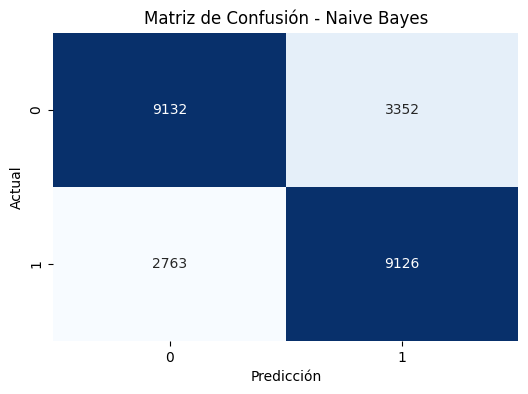

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en el conjunto de prueba para Naive Bayes
y_pred_naive_bayes = naive_bayes_classifier.predict(X_test)

# Calcular la matriz de confusión para Naive Bayes
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Visualización de la matriz de confusión para Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()


In [34]:
from sklearn.linear_model import LogisticRegression

# Crear un clasificador de Regresión Logística
logistic_regression_classifier = LogisticRegression()

# Entrenar el modelo en el conjunto de entrenamiento
logistic_regression_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Regresión Logística:", accuracy)

# Mostrar un informe de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo de Regresión Logística: 0.7666680343002503
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     12484
           1       0.77      0.74      0.76     11889

    accuracy                           0.77     24373
   macro avg       0.77      0.77      0.77     24373
weighted avg       0.77      0.77      0.77     24373



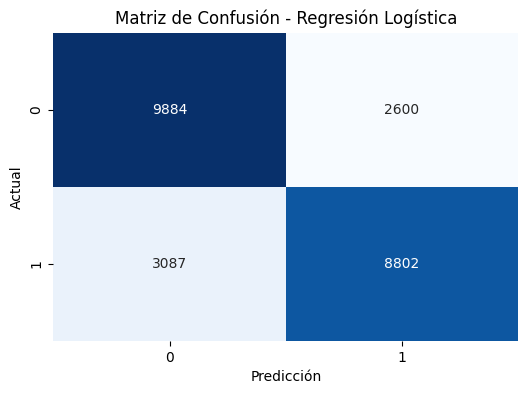

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en el conjunto de prueba para Regresión Logística
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test)

# Calcular la matriz de confusión para Regresión Logística
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

# Visualización de la matriz de confusión para Regresión Logística
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic_regression, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Crear un clasificador Naive Bayes
naive_bayes_classifier = MultinomialNB()

# Definir los valores de alpha que deseas probar
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(naive_bayes_classifier, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en cuadrícula en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha encontrado por la búsqueda en cuadrícula
best_alpha = grid_search.best_params_['alpha']

# Entrenar el modelo de Naive Bayes con el mejor valor de alpha
best_naive_bayes_classifier = MultinomialNB(alpha=best_alpha)
best_naive_bayes_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el modelo ajustado
y_pred = best_naive_bayes_classifier.predict(X_test)

# Calcular la precisión del modelo ajustado
accuracy = accuracy_score(y_test, y_pred)
print("Mejor valor de alpha:", best_alpha)
print("Precisión del modelo Naive Bayes ajustado:", accuracy)


Mejor valor de alpha: 0.1
Precisión del modelo Naive Bayes ajustado: 0.7497640832068272


In [38]:
from sklearn.model_selection import GridSearchCV

# Crear un clasificador de Regresión Logística
logistic_regression_classifier = LogisticRegression()

# Definir los valores de C que deseas probar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(logistic_regression_classifier, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en cuadrícula en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de C encontrado por la búsqueda en cuadrícula
best_C = grid_search.best_params_['C']

# Entrenar el modelo de Regresión Logística con el mejor valor de C
best_logistic_regression_classifier = LogisticRegression(C=best_C)
best_logistic_regression_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el modelo ajustado
y_pred = best_logistic_regression_classifier.predict(X_test)

# Calcular la precisión del modelo ajustado
accuracy = accuracy_score(y_test, y_pred)
print("Mejor valor de C:", best_C)
print("Precisión del modelo de Regresión Logística ajustado:", accuracy)


c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Mejor valor de C: 10
Precisión del modelo de Regresión Logística ajustado: 0.7672014113978582
